# **Spam Mail Detection**
This notebook builds a machine learning model to classify emails as spam or ham.

## **1. Importing Libraries**
We import necessary libraries for data handling, visualization, and machine learning.

In [1]:
#Importing all The necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## **2. Loading and Exploring Data**
We load the dataset and check its structure.

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/Mq930/Spam-Detection/refs/heads/main/Spam.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


## **3. Data Preprocessing**
We map category labels (`ham` to 0 and `spam` to 1) for model training.

In [4]:
#Mapping the Targeted Variable
Y_dic={"ham":0,"spam":1}
df["Category"]=df["Category"].map(Y_dic)

In [5]:
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


## **4. Splitting the Dataset**
We split the dataset into training (80%) and testing (20%) sets.

In [6]:
#Spliting the dataset for Training and Testing
X,tx,Y,ty=train_test_split(df["Message"],df["Category"],test_size=0.2,random_state=42)

## **5. Feature Engineering (Text Vectorization)**
We convert text messages into numerical representations using `CountVectorizer`.

In [7]:
#CountVectorizer is used to tokenize text data into unigrams
count=CountVectorizer()
count.fit(X.values)
x=count.transform(X.values)

## **6. Model Training**
We train a `MultinomialNB` model for spam detection.

In [8]:
#model Fitting
model=MultinomialNB()
model.fit(x,Y)

MultinomialNB()

## **7. Model Evaluation**
We evaluate the model’s performance using accuracy, confusion matrix, and classification report.

In [9]:
model.score(count.transform(tx),ty)

0.9919282511210762

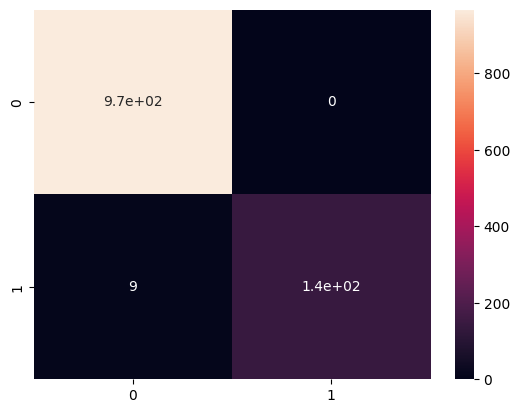

In [10]:
sns.heatmap(confusion_matrix(np.array(ty),model.predict(count.transform(tx))),annot=True)
plt.show()

In [11]:
print(classification_report(np.array(ty),model.predict(count.transform(tx))))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       966
           1       1.00      0.94      0.97       149

    accuracy                           0.99      1115
   macro avg       1.00      0.97      0.98      1115
weighted avg       0.99      0.99      0.99      1115



## **8. Testing the Model**
We test the model with sample emails.

In [12]:
emails = {
    "spam": [
        "Congratulations, you've won a $1,000 gift card! Click here to claim your prize!:sus.com",
        "Urgent! Your account has been compromised. Please provide your personal details.",
        "Earn 100% Profit on Your Investment in Just One Week!",
        "Urgent! Your Computer Has a Virus!",
        "Your bank account has been suspended. Please click to resolve now."
    ],
    "ham": [
        "Hi, let's meet for lunch tomorrow. Let me know what time works for you!",
        "Attached is the report I mentioned in the meeting earlier.",
        "I just wanted to confirm our appointment for next Tuesday.",
        "Don't forget about the team-building event on Friday afternoon.",
        "Here's the document you asked for. Let me know if you need anything else."
    ]
}

In [13]:
mails=list(emails.values())[0]+list(emails.values())[1]
array=model.predict(count.transform(mails))
for i in array:
    print(list(Y_dic.items())[i][0])

spam
spam
spam
spam
spam
ham
ham
ham
ham
ham
